### Preprocessing

In [13]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [14]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Datasets/Auto.csv"
df = pd.read_csv(url)

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [18]:
df.horsepower.dtype

dtype('int64')

In [19]:
df['hp'] = df.horsepower.astype(float)

In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hp
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,130.0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,165.0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,150.0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,150.0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,140.0


In [21]:
df.hp.dtype

dtype('float64')

*Okay cool!*

### k-Fold Cross-Validation

In [22]:
from sklearn.model_selection import KFold as KF

In [23]:
kf = KF(n_splits=10) # k = 10

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
MSE_all = pd.DataFrame()

In [27]:
from sklearn.preprocessing import PolynomialFeatures as PF

In [29]:
for i in range(1,11):
    MSE = 0
    X = df[['hp']]
    X_ = pd.DataFrame(PF(i).fit_transform(X))
    X_.drop(columns=0, inplace=True)
    y = df[['mpg']]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lmfit = LinearRegression().fit(X_train, y_train)
        lmpred = lmfit.predict(X_test)
        MSE += mean_squared_error(y_test, lmpred)
    MSE_mean = MSE/10
    MSE_all = MSE_all.append([MSE_mean])

In [30]:
MSE_all.columns = [['MSE']]
MSE_all.reset_index(drop=True, inplace=True)
round(MSE_all, 2)

,MSE
0,27.81
1,21.50
2,21.60
3,21.61
4,21.14
5,21.02
6,21.19
7,21.33
8,21.29
9,21.23


Text(0,0.5,'MSE')

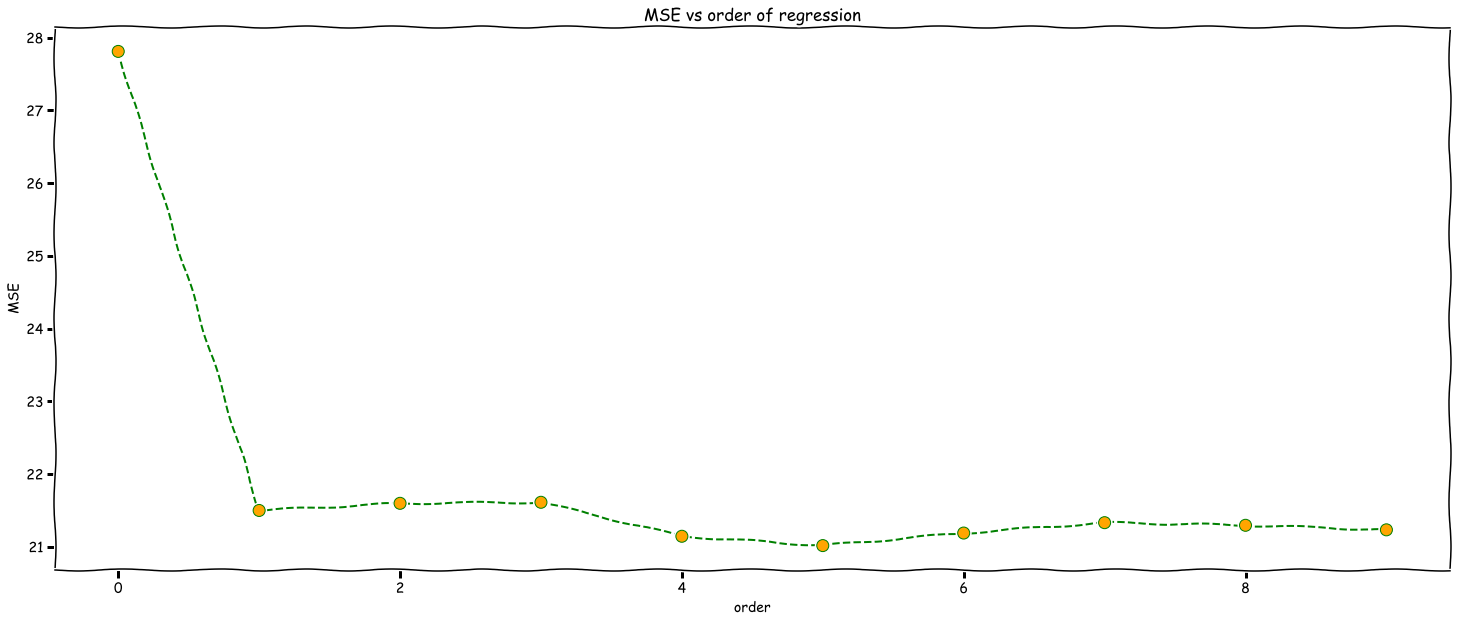

In [40]:
plt.xkcd()
plt.figure(figsize = (25, 10))
plt.plot(MSE_all, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12, markerfacecolor = 'orange')
plt.title("MSE vs order of regression")
plt.xlabel("order")
plt.ylabel("MSE")

**Some observations: First, the computation time was significantly lesser than LOOCV. Second, there is a slight difference
in errors between LOOCV and K-Fold CV for first order regression. This is because the k-Fold CV corrects for bias.**